In [1]:
import pandas as pd

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('~/Datasets/Titanic/train.csv')
test = pd.read_csv('~/Datasets/Titanic/test.csv')

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
encoder = OrdinalEncoder()
train['Sex'] = encoder.fit_transform(train[['Sex']])
test['Sex'] = encoder.fit_transform(np.array(test['Sex']).reshape(-1, 1))

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
passenger_id = test['PassengerId']

In [7]:
passenger_id

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [8]:
train = train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
test = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [9]:
train['AgeUnknown'] = [1 if pd.isna(x) else 0 for x in train['Age']]
test['AgeUnknown'] = [1 if pd.isna(x) else 0 for x in test['Age']]

In [10]:
imputer = KNNImputer()
train['Age'] = imputer.fit_transform(train[['Age']])
test['Age'] = imputer.fit_transform(test[['Age']])
test['Fare'] = imputer.fit_transform(test[['Fare']])

test

,Pclass,Sex,Age,SibSp,Parch,Fare,AgeUnknown
0,3,1.0,34.50000,0,0,7.8292,0
1,3,0.0,47.00000,1,0,7.0000,0
2,2,1.0,62.00000,0,0,9.6875,0
3,3,1.0,27.00000,0,0,8.6625,0
4,3,0.0,22.00000,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,1.0,30.27259,0,0,8.0500,1
414,1,0.0,39.00000,0,0,108.9000,0
415,3,1.0,38.50000,0,0,7.2500,0
416,3,1.0,30.27259,0,0,8.0500,1


In [11]:
corr_matrix = train.corr()
corr_matrix

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeUnknown
Survived,1.000000,-0.338481,-0.543351,-6.980852e-02,-0.035322,0.081629,0.257307,-9.219652e-02
Pclass,-0.338481,1.000000,0.131900,-3.313388e-01,0.083081,0.018443,-0.549500,1.729329e-01
Sex,-0.543351,0.131900,1.000000,8.415344e-02,-0.114631,-0.245489,-0.182333,5.521512e-02
Age,-0.069809,-0.331339,0.084153,1.000000e+00,-0.232625,-0.179191,0.091566,-1.303789e-16
SibSp,-0.035322,0.083081,-0.114631,-2.326246e-01,1.000000,0.414838,0.159651,1.895757e-02
Parch,0.081629,0.018443,-0.245489,-1.791909e-01,0.414838,1.000000,0.216225,-1.241038e-01
Fare,0.257307,-0.549500,-0.182333,9.156609e-02,0.159651,0.216225,1.000000,-1.007071e-01
AgeUnknown,-0.092197,0.172933,0.055215,-1.303789e-16,0.018958,-0.124104,-0.100707,1.000000e+00


<AxesSubplot: xlabel='Age', ylabel='Count'>

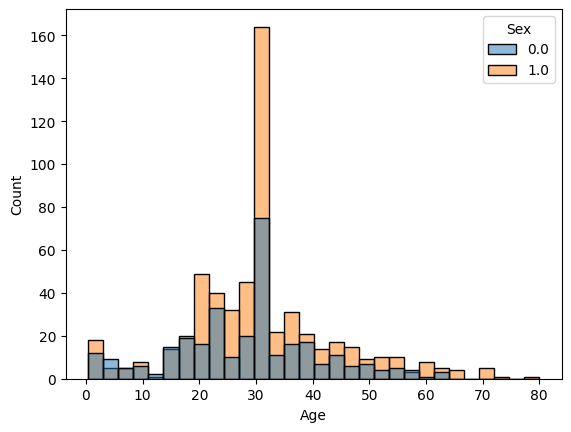

In [12]:
sns.histplot(data = train, x='Age', hue='Sex')

<AxesSubplot: xlabel='Age', ylabel='Count'>

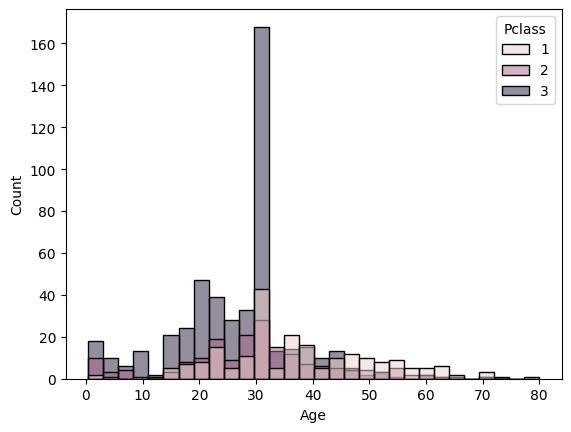

In [13]:
sns.histplot(data = train, x='Age', hue='Pclass')

In [14]:
x = train.drop('Survived', axis=1)
y = train['Survived']

In [15]:
scaler = StandardScaler()
x_train = scaler.fit_transform(train)
x_test = scaler.fit_transform(test)

In [16]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2,  random_state=42)

In [17]:
rfc1 = RandomForestClassifier()
rfc1.fit(x_train, y_train)
rfc1_acc = accuracy_score(y_valid, rfc1.predict(x_valid))

In [18]:
rfc1_acc

0.8100558659217877

In [19]:
predictions = rfc1.predict(x_test)
predictions = [0 if pred < 0.5 else 1 for pred in predictions]

output = pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions})
output.to_csv('submission3.csv', index=False)
print("Submission was successfully saved!")

NameError: name 'rfc2' is not defined

In [20]:
rfc2 = RandomForestClassifier(n_estimators=100, max_features=4, max_depth=12)
rfc2.fit(x_train, y_train)
rfc2_acc = accuracy_score(y_valid, rfc2.predict(x_valid))

In [21]:
rfc2_acc

0.8156424581005587

In [22]:
predictions = rfc2.predict(x_test)
predictions = [0 if pred < 0.5 else 1 for pred in predictions]

output = pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions})
output.to_csv('submission4.csv', index=False)
print("Submission was successfully saved!")

Submission was successfully saved!


/home/adam/.conda/envs/tf/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
sgd = SGDClassifier(max_iter=500, loss='log_loss', penalty=None, alpha=0.001, tol=0.1)
sgd.fit(x_train, y_train)
sgd_acc = accuracy_score(y_valid, sgd.predict(x_valid))

In [ ]:
sgd_acc

In [ ]:
kn = KNeighborsClassifier(n_neighbors=20)
kn.fit(x_train, y_train)
kn_acc = accuracy_score(y_valid, kn.predict(x_valid))

In [ ]:
kn_acc

In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr_acc = accuracy_score(y_valid, lr.predict(x_valid))

In [ ]:
lr_acc

In [ ]:
voting_clf = VotingClassifier(
estimators=[('lr', lr), ('rfc1', rfc1), ('rfc2', rfc2), ('sgd', sgd), ('kn', kn)],
voting='hard')
voting_clf.fit(x_train, y_train)
vc_acc = accuracy_score(y_valid, voting_clf.predict(x_valid))

In [ ]:
vc_acc

In [ ]:
nn_acc

In [ ]:
predictions = voting_clf.predict(x_test)

In [ ]:
output = pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Submission was successfully saved!")

In [ ]:
submission = pd.read_csv('submission.csv')

In [ ]:
submission

In [ ]:
from keras.models import load_model

x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.resize(712, 7, 1)

model = load_model('model.h5')
_, nn_acc = model.evaluate(x_valid, y_valid)
predictions = model.predict(x_test)
predictions = [0 if pred < 0.5 else 1 for pred in predictions]

output = pd.DataFrame({'PassengerId': passenger_id, 'Survived': predictions})
output.to_csv('submission2.csv', index=False)
print("Submission was successfully saved!")
